# 研究TDA

In [1]:
%load_ext autoreload
%autoreload 2

# 加载自己的包
from TDA.data_tda import Image2TDA, CompareTDA

## 定义TDA绘制函数

In [2]:
def draw_all(model_name, aug_name, chose = '20240102_new_ResNet_1k'):
    folder = "./Result/{}/{}/{}".format(chose, model_name, aug_name)
    test_BOF = CompareTDA(file_path=folder, target_pkl="L2_betti_features_0th.pkl")

    # print(test_BOF.comb_BOF)
    # print(model_name, aug_name)
    test_BOF.draw_BOF(net_name=model_name, aug_name=aug_name)

## 观察各种网络与增强

MLP angle


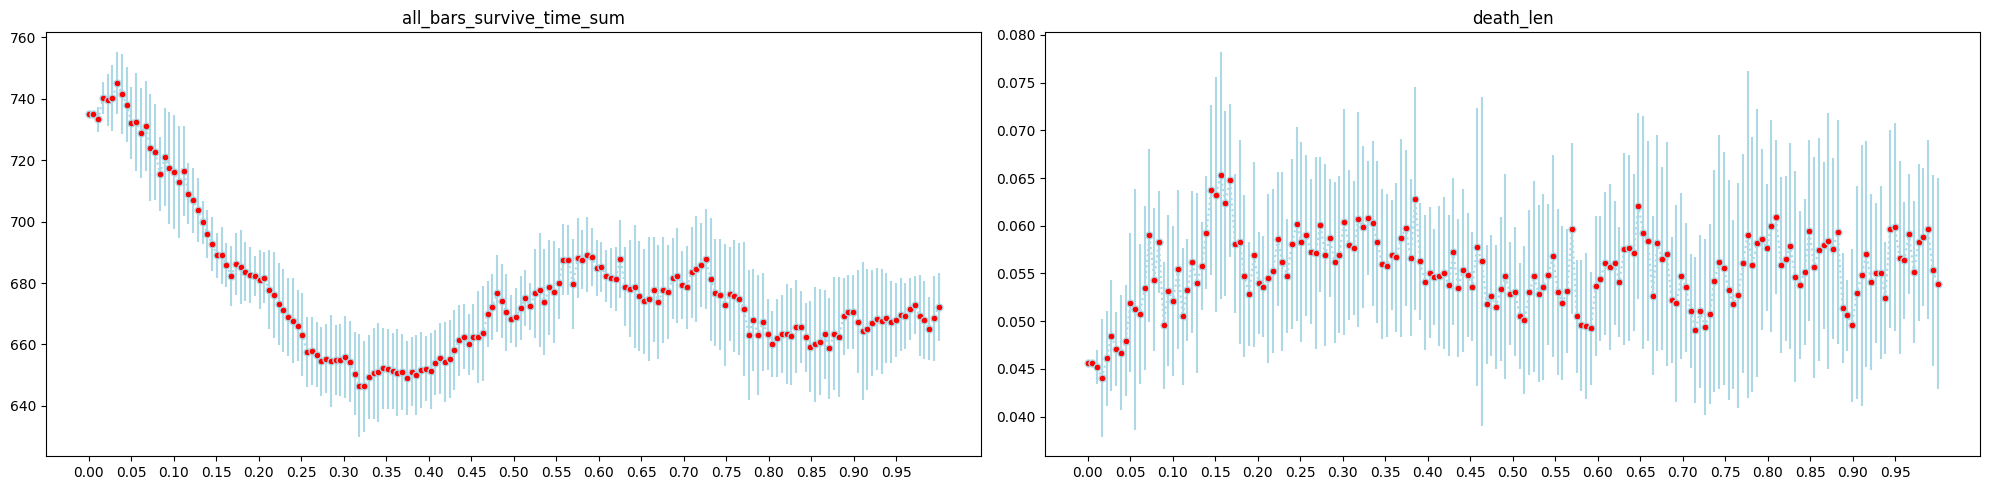

LeNet angle


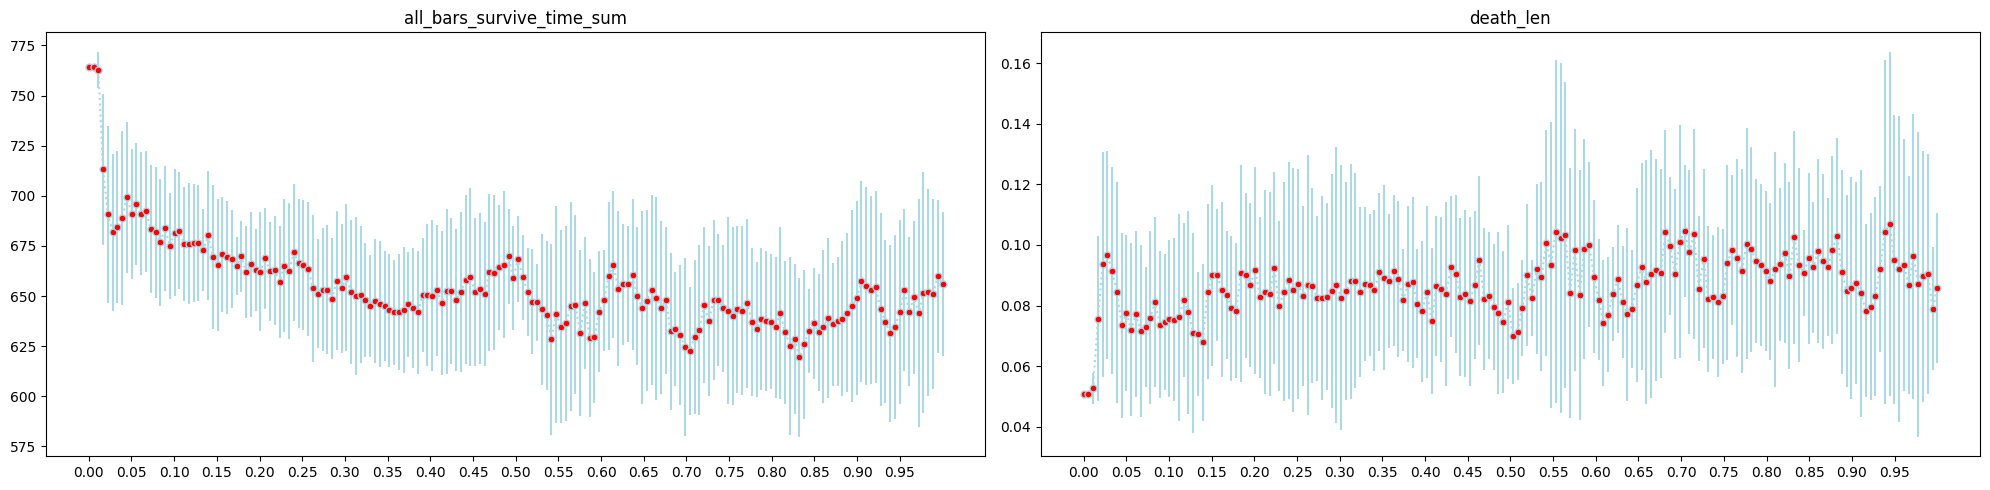

ResNet18 angle


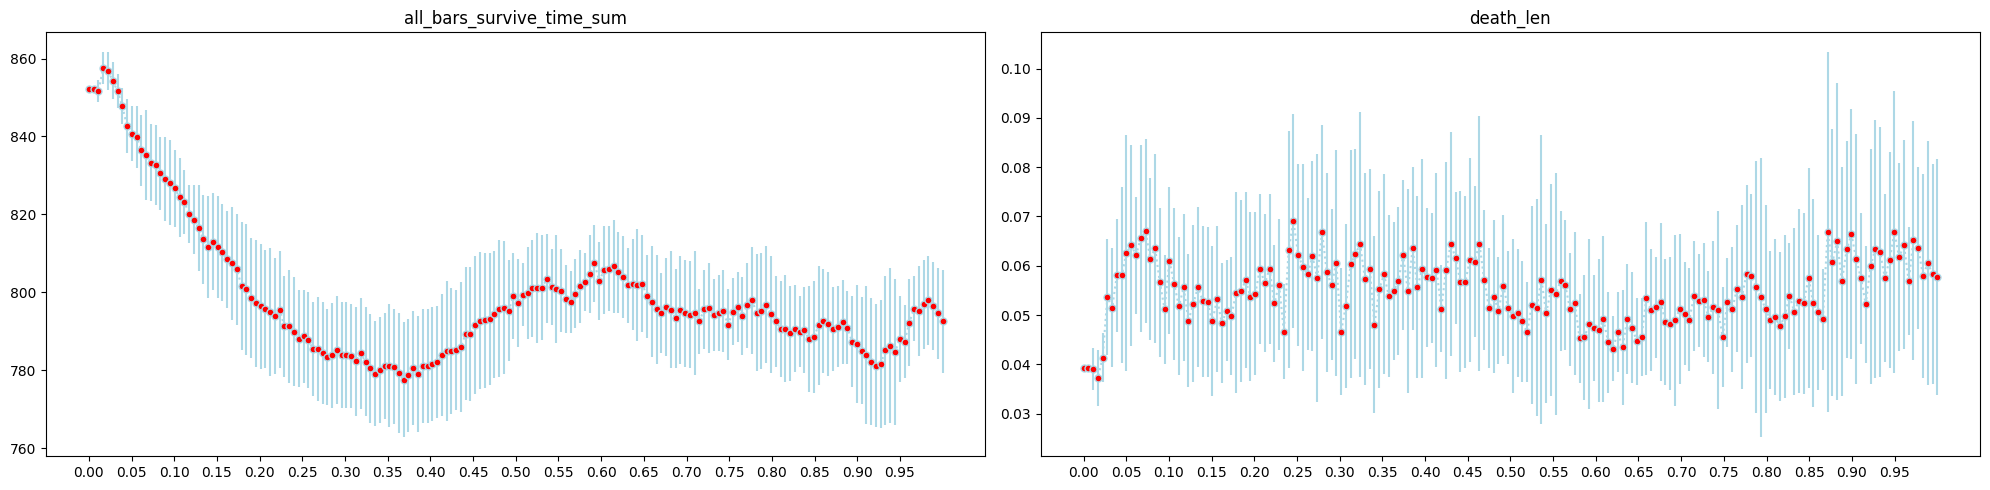

ResNet34 angle


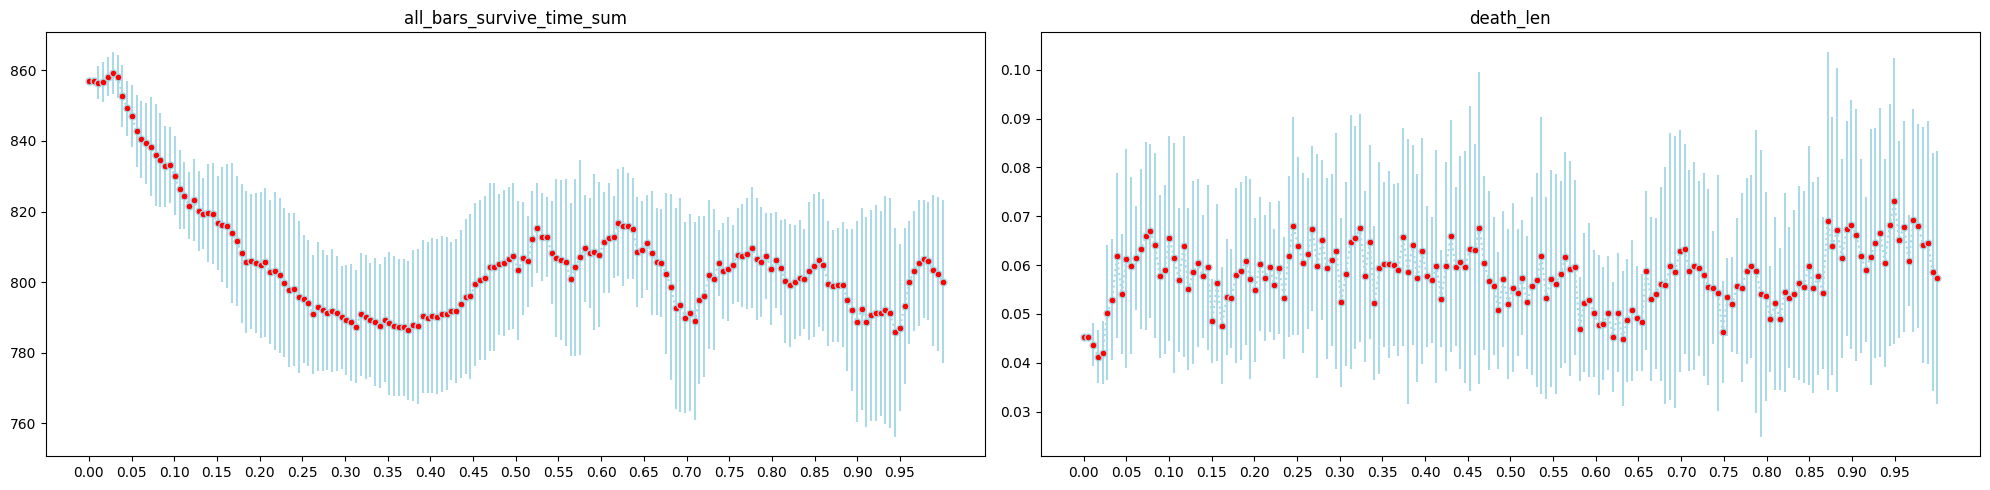

ResNet50 angle


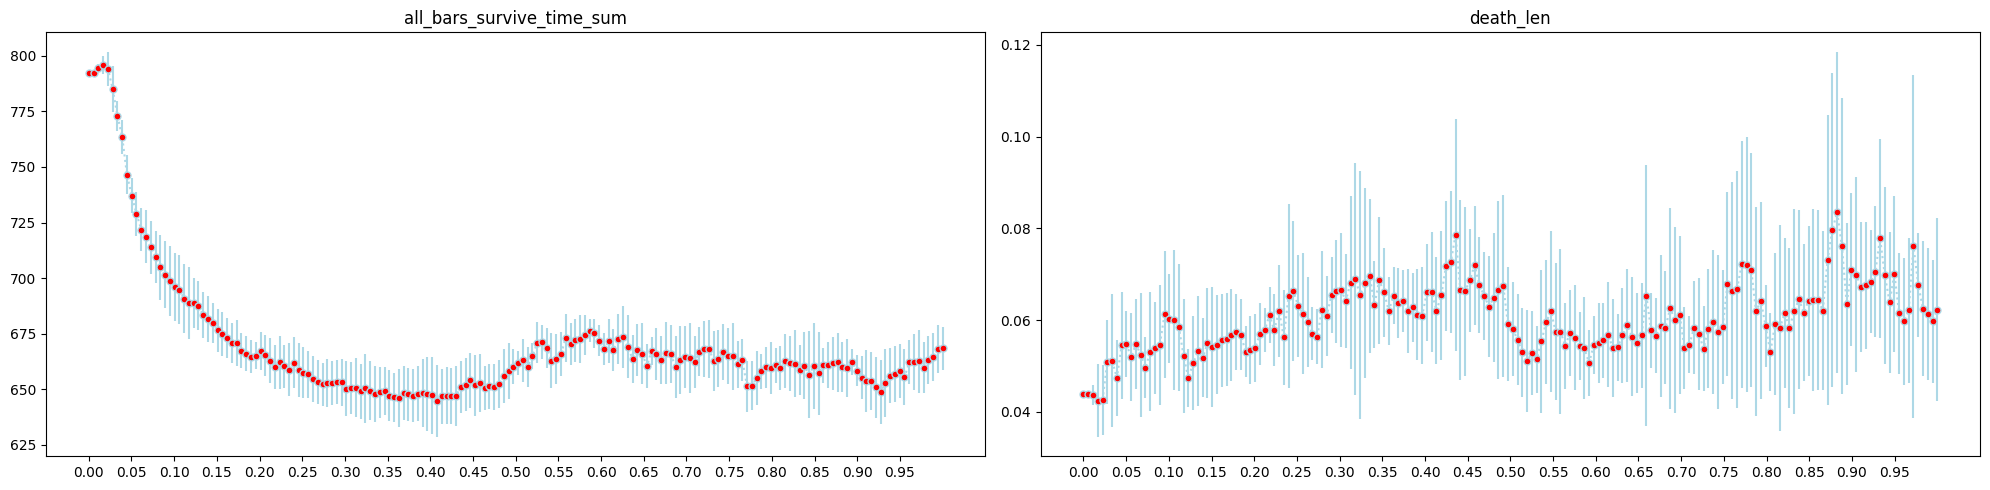

ResNet101 angle


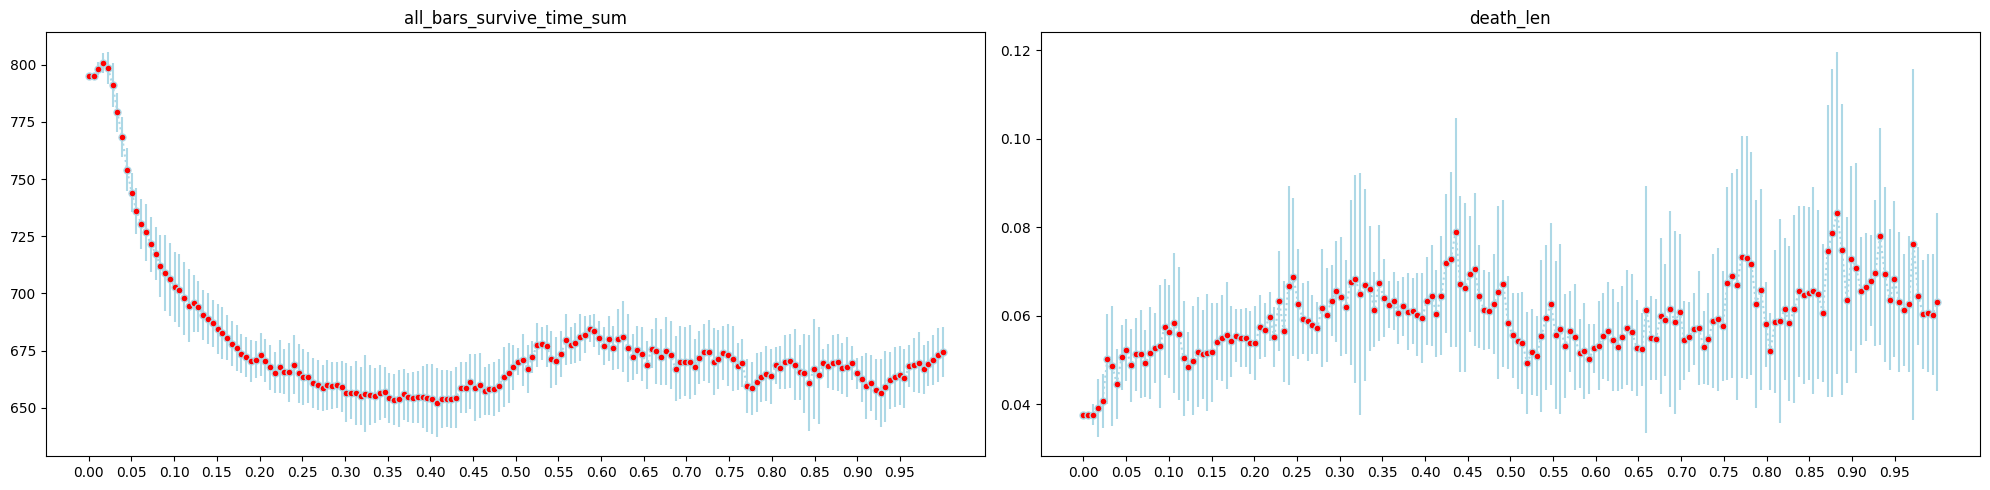

ResNet152 angle


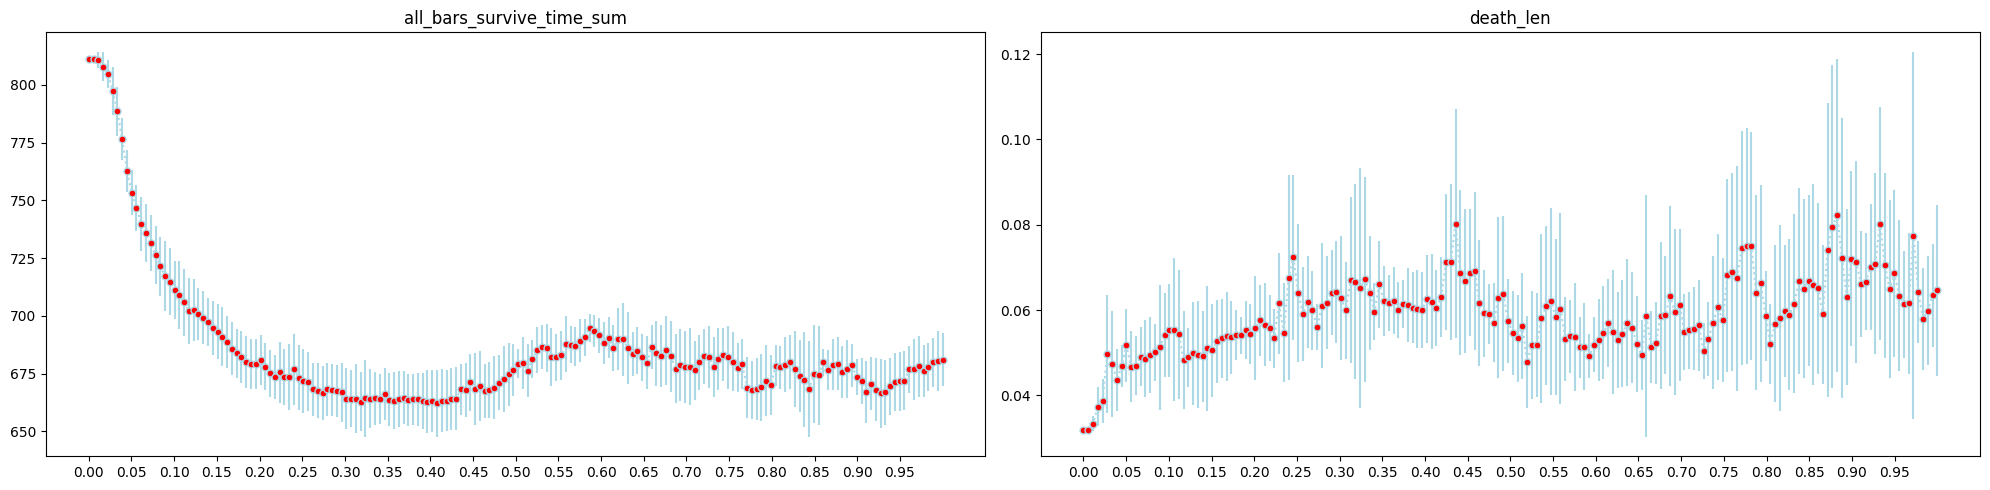

In [3]:
model_name_list = ['MLP', 'LeNet', 'ResNet18', 'ResNet34', 'ResNet50', 'ResNet101', 'ResNet152']
aug_name_list = ['angle']
import matplotlib.pyplot as plt

for model_name, aug_name in [(m ,a) for m in model_name_list for a in aug_name_list]:
    print(model_name, aug_name)
    draw_all(model_name=model_name, aug_name=aug_name)
    plt.close()
    

# 研究TDA和网络参数的关系

## 研究网络的参数

### 定义计算网络参数的函数

In [4]:
def count_parameters(models):
    parameters_count = []

    for model in models:
        # print(type(model).__name__)
        parameters_count.append(sum(p.numel() for p in model.parameters()))

    return parameters_count



### 得到新ResNet的参数

In [5]:
from nets.resnet import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
from nets.simple_net import MLP, LeNet

model_list = [MLP(), LeNet(), ResNet18(), ResNet34(), ResNet50(), ResNet101(), ResNet152()]

new_para_list = count_parameters(model_list)
print(new_para_list)

[1707274, 136886, 11173962, 21282122, 23520842, 42512970, 58156618]


### 得到旧ResNet的参数

In [6]:
from nets.simple_net import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
from nets.simple_net import MLP, LeNet

model_list = [MLP(), LeNet(), ResNet18(), ResNet34(), ResNet50(), ResNet101(), ResNet152()]

old_para_list = count_parameters(model_list)
print(old_para_list)

[1707274, 136886, 11173962, 21282122, 21282122, 41353546, 57883978]


## 得到没有增强的TDA

### 定义函数得到TDA没有增强

In [7]:
import os
import pickle

def read_pkl_files(folder_path, target_filenames):
    TDA_all_survive_times = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".pkl") and file in target_filenames:
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'rb') as f:
                        data = pickle.load(f)
                        print(f"File: {file_path}")
                        print("Content:")
                        print(data["all_bars_survive_time_sum"])
                        # print(data)
                        print("\n")
                        TDA_all_survive_times.append(data["all_bars_survive_time_sum"][0])
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    return TDA_all_survive_times


### 读取文件得到需要的数据

In [8]:
# 例如，指定要关注的pkl文件名列表
target_files = ["L2_betti_features_0th.pkl"]  # 以实际文件名为准

# 调用函数并传入文件夹路径和指定的文件名列表
folder_path = ".\Result\\without_aug"  # 指定文件夹路径
TDA_all_survive_times = read_pkl_files(folder_path, target_files)
print(TDA_all_survive_times)

File: .\Result\without_aug\data\0\L2_betti_features_0th.pkl
Content:
(692.5522839362154, 0.0)


File: .\Result\without_aug\LeNet\0\L2_betti_features_0th.pkl
Content:
(764.2915, 0.0)


File: .\Result\without_aug\MLP\0\L2_betti_features_0th.pkl
Content:
(735.0973, 0.0)


File: .\Result\without_aug\ResNet101\0\L2_betti_features_0th.pkl
Content:
(795.2896, 0.0)


File: .\Result\without_aug\ResNet152\0\L2_betti_features_0th.pkl
Content:
(811.0676, 0.0)


File: .\Result\without_aug\ResNet18\0\L2_betti_features_0th.pkl
Content:
(852.0752, 0.0)


File: .\Result\without_aug\ResNet34\0\L2_betti_features_0th.pkl
Content:
(856.92474, 0.0)


File: .\Result\without_aug\ResNet50\0\L2_betti_features_0th.pkl
Content:
(792.4922, 0.0)


[692.5522839362154, 764.2915, 735.0973, 795.2896, 811.0676, 852.0752, 856.92474, 792.4922]


## 绘制图像

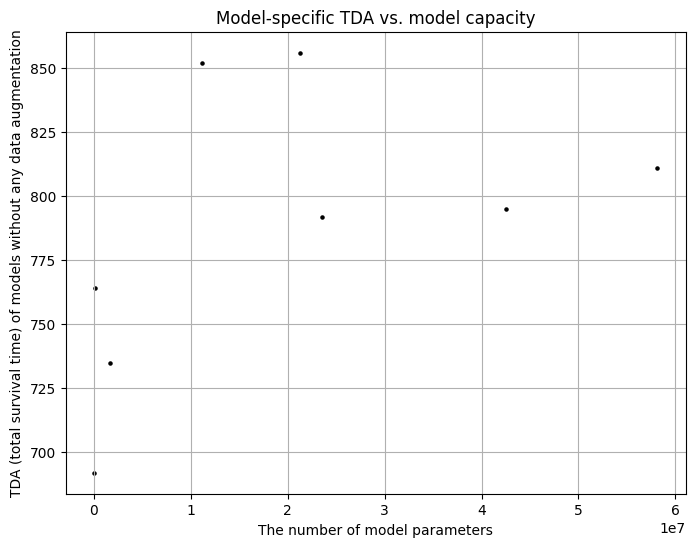

In [9]:
# 绘制图像
TDA_all_survive_times = [692, 735, 764, 852, 856, 792, 795, 811]
new_para_list = [0, 1707274, 136886, 11173962, 21282122, 23520842, 42512970, 58156618]

plt.figure(figsize=(8, 6))  # 设置图像大小
plt.scatter(new_para_list, TDA_all_survive_times, marker='o', s=5, color='black')  # 绘制其余点
# plt.plot(old_para_list, TDA_all_survive_times, linestyle=':', linewidth=1, color='blue')  # 绘制图像

plt.xlabel(f"The number of model parameters")  # 设置横坐标标签
plt.ylabel(f"TDA (total survival time) of models without any data augmentation")  # 设置纵坐标标签
plt.title(f"Model-specific TDA vs. model capacity")  # 设置图像标题
plt.grid(True)  # 添加网格线
# plt.savefig(f"{self.save_path}/{tda_col}_{acc_col}_{self.acc_sheet_name}_plot.png")  # 保存图片
plt.show()
plt.close()  # 关闭图像

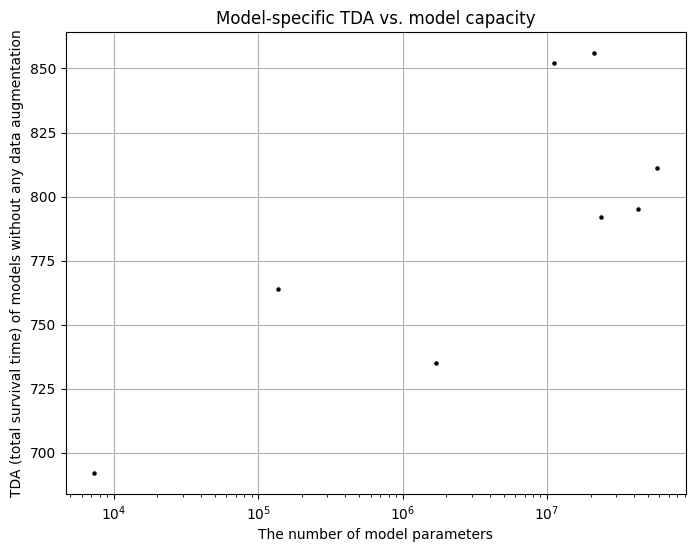

In [10]:
import matplotlib.pyplot as plt

TDA_all_survive_times = [692, 735, 764, 852, 856, 792, 795, 811]
new_para_list = [7274, 1707274, 136886, 11173962, 21282122, 23520842, 42512970, 58156618]

plt.figure(figsize=(8, 6))  # 设置图像大小
plt.scatter(new_para_list, TDA_all_survive_times, marker='o', s=5, color='black')  # 绘制其余点
plt.xscale('log')  # 将横坐标设置为对数坐标系

plt.xlabel(f"The number of model parameters")  # 设置横坐标标签
plt.ylabel(f"TDA (total survival time) of models without any data augmentation")  # 设置纵坐标标签
plt.title(f"Model-specific TDA vs. model capacity")  # 设置图像标题
plt.grid(True)  # 添加网格线
plt.show()
plt.close()  # 关闭图像


# 研究TDA与Acc之间的关系

X-axis: best augmentation magnitude based on TDA for each model

Y-axis: best augmentation magnitude based on validation accuracy for each model

然后算一下这7个点的spearman correlation

## 定义得到最佳TDA对应的增强的函数

In [11]:
import numpy as np
def get_bset_tda_aug(model_name, aug_name, chose = '20240102_new_ResNet_1k'):
    folder = "./Result/{}/{}/{}".format(chose, model_name, aug_name)
    test_BOF = CompareTDA(file_path=folder, target_pkl="L2_betti_features_0th.pkl")

    # print(test_BOF.comb_BOF)
    # print(model_name, aug_name)
    test_BOF.draw_BOF(net_name=model_name, aug_name=aug_name)
    max_value_index = test_BOF.values.index(max(test_BOF.values))
    if aug_name == 'angle':
        aug_range = range(0, 180, 1)
    elif aug_name == 'scale':
        aug_range = np.arange(0.1, 1.02, 0.02)
    print(test_BOF.values,'\n',max_value_index, aug_range[max_value_index])
    return aug_range[max_value_index]

## 研究不同网络下和增强下的情况

MLP angle


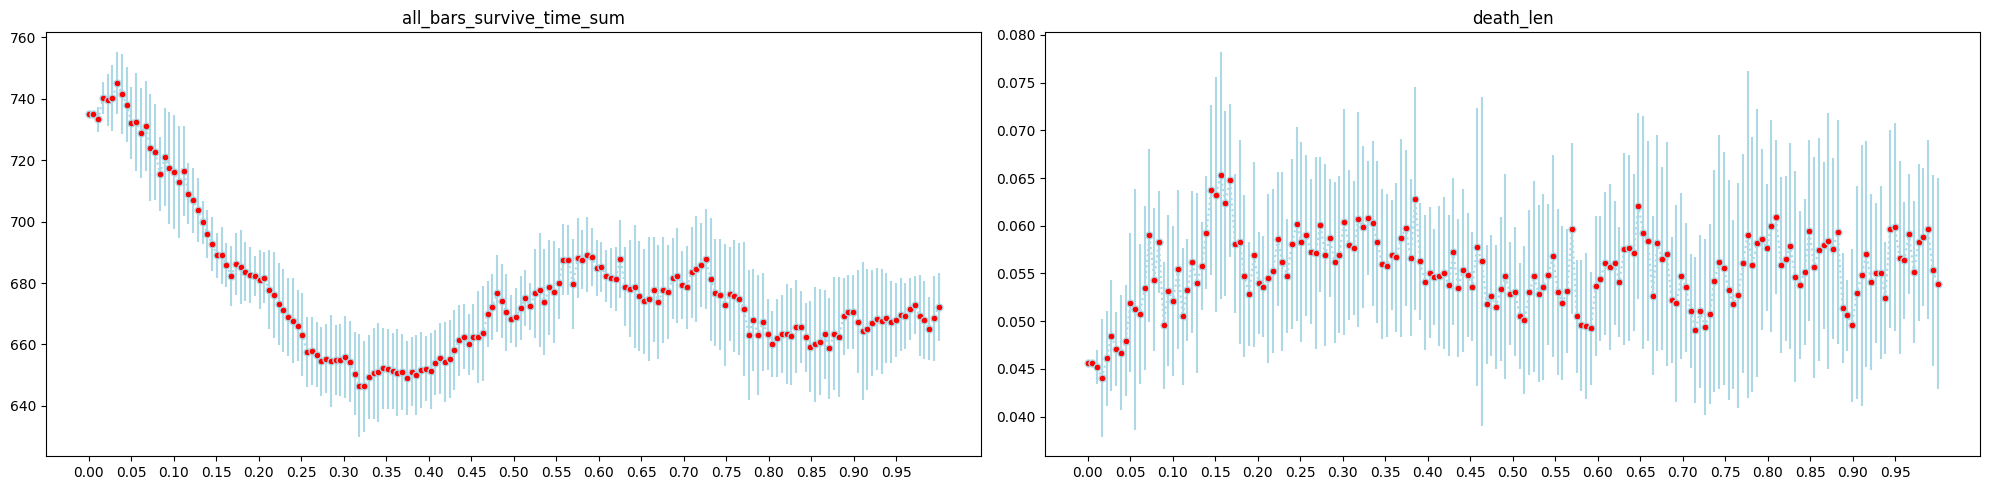

[(735.0973, 0.0), (735.0973, 0.0), (733.3538, 4.112065280869632), (740.32074, 5.230415700020325), (739.6471, 8.5329891059274), (740.29706, 10.61392924301265), (745.15424, 10.228512796524567), (741.54205, 12.935385843991043), (738.15094, 12.087837302405593), (732.2592, 11.734032728760143), (732.4785, 15.905760787818108), (728.99084, 14.631643104715394), (731.05585, 14.704740813862418), (724.0531, 17.394335480451733), (722.7149, 15.55606315318056), (715.5675, 12.02385572602443), (720.9254, 15.951292561694085), (717.4394, 18.287125070539293), (716.23303, 18.63731829442726), (712.8237, 18.21082748559712), (716.48114, 14.713132404920207), (709.0711, 9.918802954995389), (706.89276, 10.55828111657476), (703.81616, 10.377624506356087), (699.868, 6.992860111075097), (696.0624, 7.8822217540766895), (692.79584, 8.87424962146959), (689.05145, 7.235743815025842), (689.0198, 9.277336048790039), (685.9635, 7.13607217268956), (682.2492, 9.676606007617167), (686.1715, 10.151407916766278), (685.31433, 1

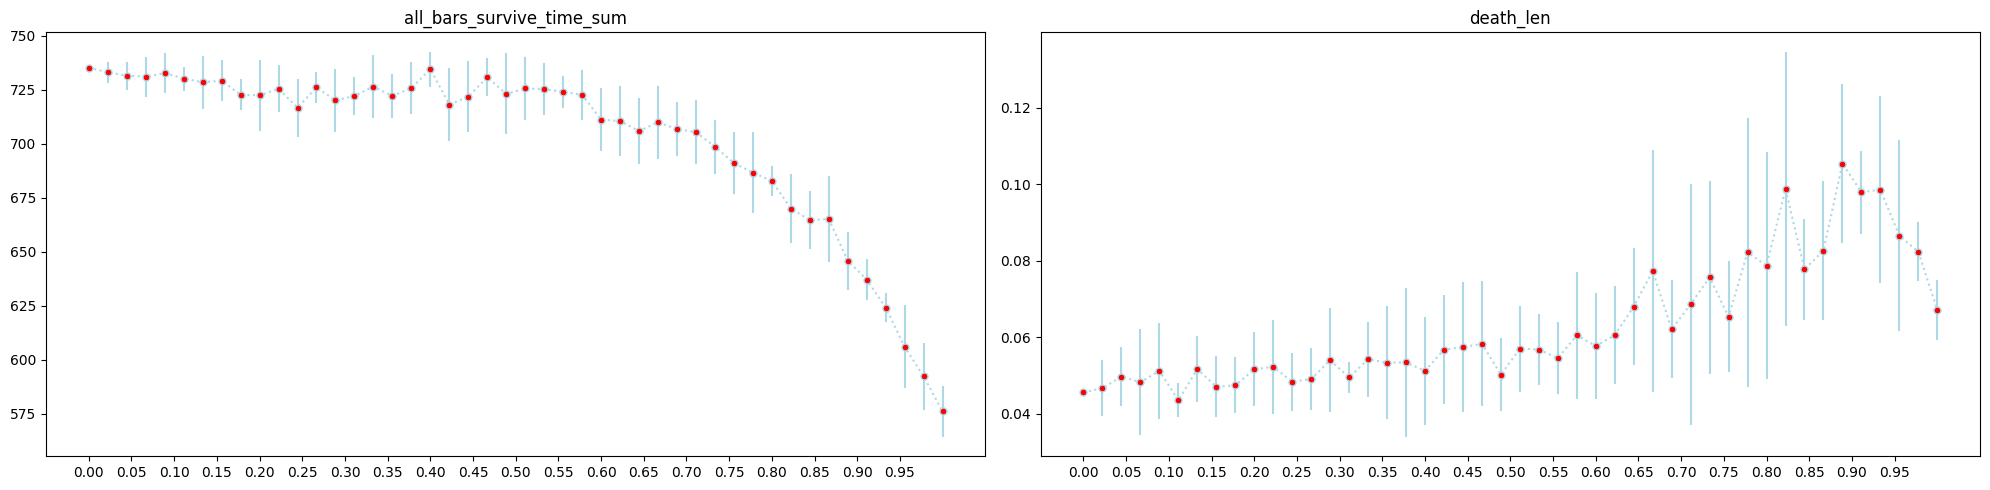

[(576.0321, 11.869241449497228), (592.2235, 15.601194811816855), (605.90137, 19.165165304644233), (624.08795, 6.896767889266313), (637.0742, 9.52555189148485), (645.74695, 13.510990334994506), (665.17725, 19.819617306620714), (664.5959, 13.485254327331397), (669.9698, 15.958768195827345), (682.72943, 6.768265719985937), (686.5601, 18.68755173609999), (691.06287, 14.208707847925288), (698.6035, 12.51702185411587), (705.3441, 14.740664709196883), (706.7512, 12.398541480993945), (709.8611, 16.861313539959202), (705.8391, 15.454570542797857), (710.4305, 16.314653410270072), (711.155, 14.475165714688623), (722.6084, 11.425789243981516), (723.9692, 7.342877926825503), (725.24475, 12.081019531658782), (725.55475, 14.380041063407624), (723.0016, 18.750920194673323), (730.8256, 8.863466649009904), (721.73303, 16.44722518141425), (718.1265, 16.672430684786704), (734.5114, 8.110930789589222), (725.68854, 11.902975610296005), (722.0701, 9.97952878780671), (726.46027, 14.553111916140475), (722.0702

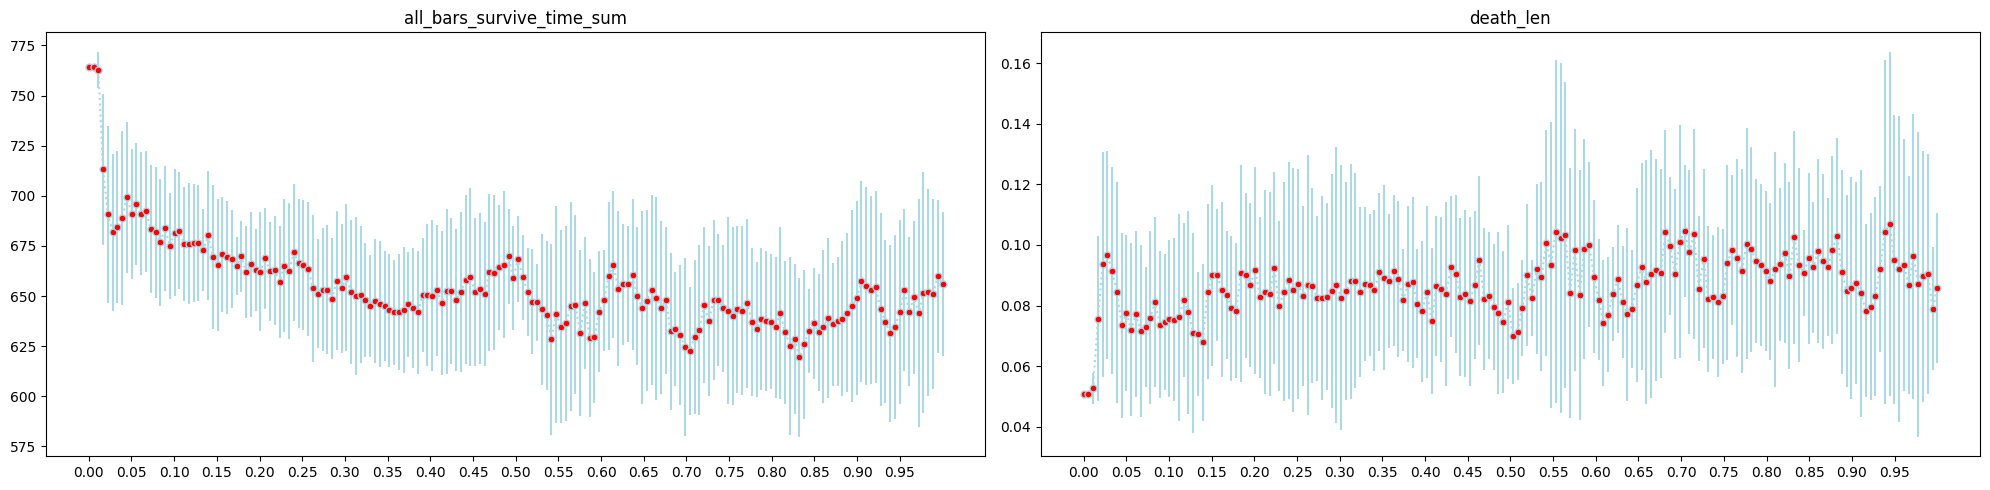

[(764.2915, 0.0), (764.2915, 0.0), (762.869, 9.033140667318523), (713.1158, 37.497811147537774), (690.709, 44.25952193404682), (681.85547, 39.1880235025166), (684.6086, 37.885597016287925), (688.813, 43.2982918320337), (699.3159, 37.70812553014366), (690.9461, 32.20706886715797), (695.89764, 30.552326524318072), (690.9475, 30.671758070305344), (692.18896, 30.205444387904016), (683.4113, 31.863790679643564), (681.70306, 32.572618415718836), (676.823, 31.729051843124108), (683.7221, 30.946123096311364), (674.91266, 26.4940883192332), (681.5732, 31.74871973622337), (682.6597, 29.35175698094089), (675.86584, 28.523743085293916), (676.13007, 30.22485355647911), (676.3855, 29.360790866388594), (676.439, 28.801396708495695), (672.86487, 20.488101859652367), (680.2149, 32.07755793211323), (669.671, 35.85487887347835), (665.62225, 32.98305052330485), (670.86053, 28.752527656979698), (669.27423, 28.254481922615405), (668.56055, 24.50156130496724), (664.79193, 14.455721549337806), (669.74115, 17.

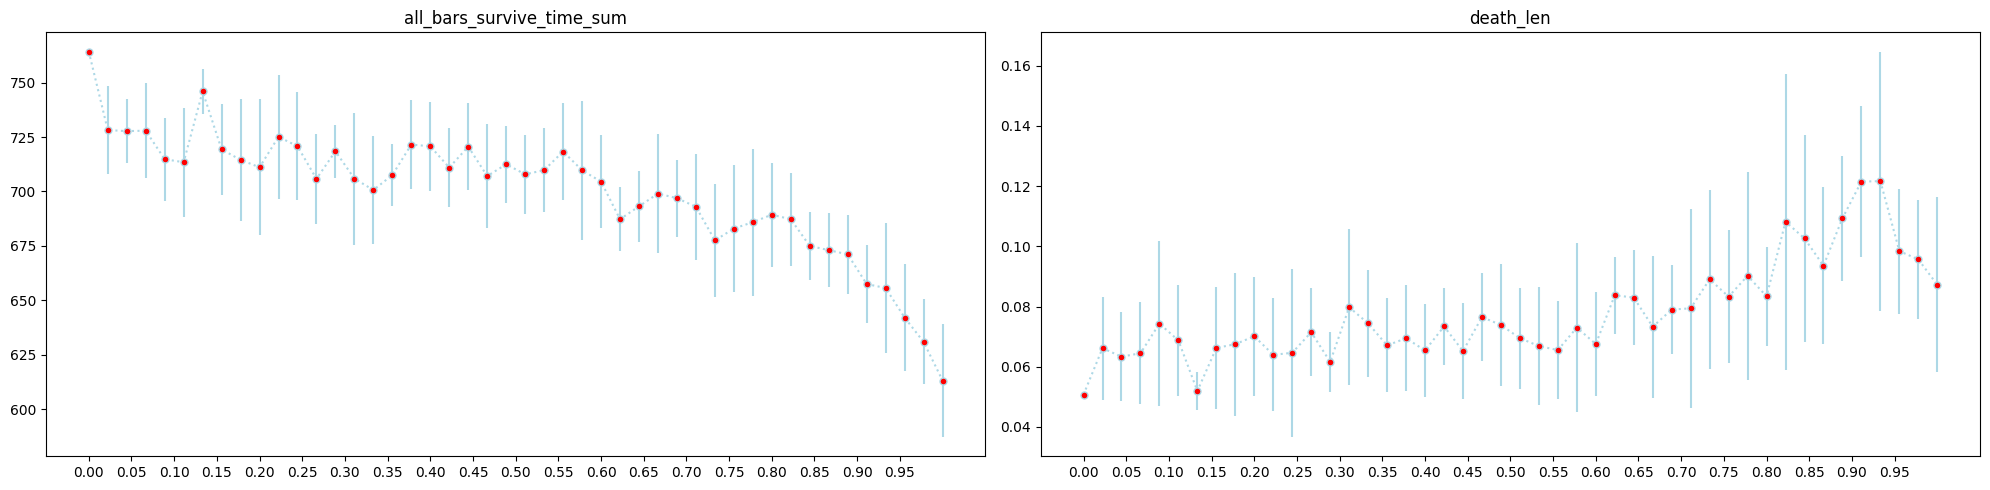

[(613.1172, 25.96576014504151), (630.86505, 19.55072335552121), (642.0344, 24.419073425247944), (655.6305, 30.09618671350627), (657.46326, 17.885680820809817), (671.096, 18.304621299908504), (673.02496, 17.121961794555453), (674.9815, 15.793537822511569), (687.2489, 21.414270093125904), (689.3364, 23.889250448865557), (685.89154, 33.81690267759616), (682.966, 29.087379860770625), (677.51, 25.857066448369295), (692.9746, 24.39152048364617), (696.93097, 17.6440935645504), (699.0288, 27.525778578575697), (693.1693, 16.309714360947954), (687.24316, 14.80605007829022), (704.5201, 21.319785279658703), (709.73865, 31.904421465239643), (718.3678, 22.203935974716558), (709.8051, 19.29405715266022), (707.87476, 18.184391174586732), (712.5138, 17.602087025180023), (707.06964, 23.72609517605436), (720.6263, 19.813356302904907), (710.9916, 18.05298488951381), (720.7729, 20.4895191616016), (721.5672, 20.608250728576284), (707.5712, 14.225829454909592), (700.6709, 25.000409151647347), (705.9171, 30.3

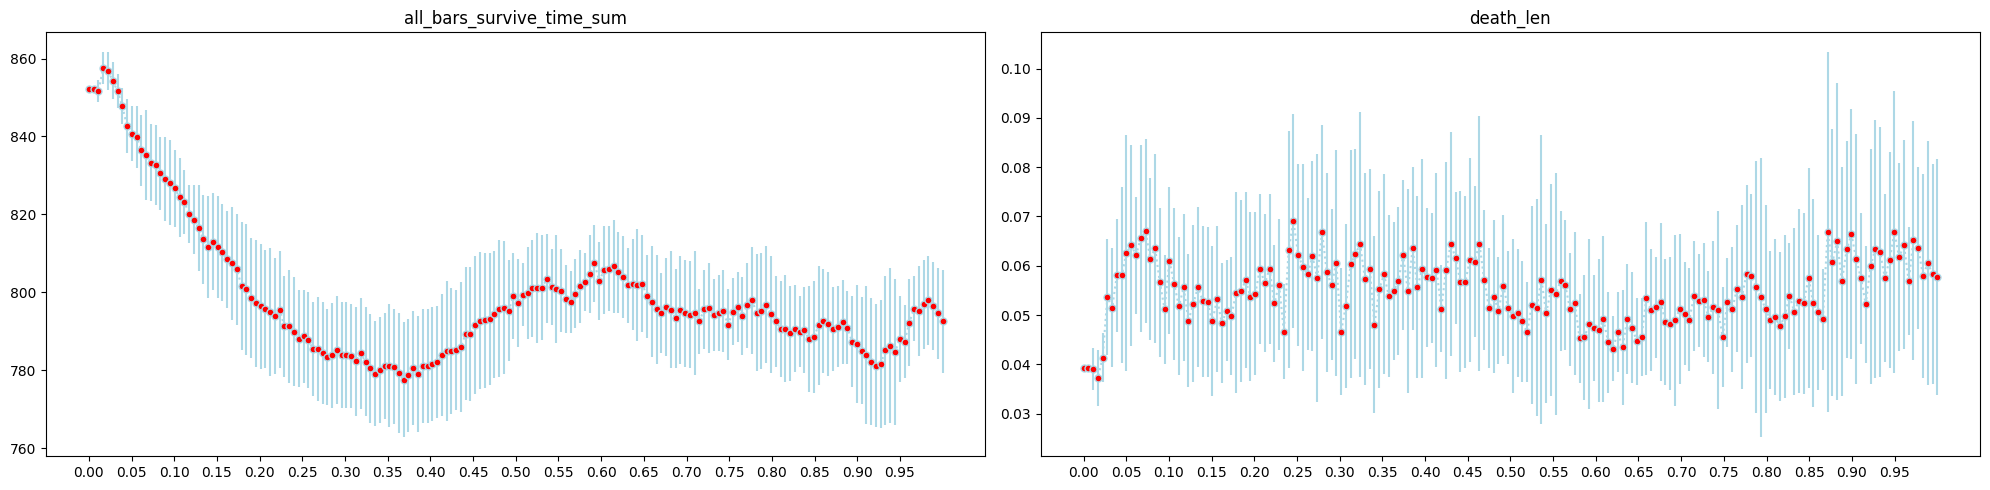

[(852.0752, 0.0), (852.0752, 0.0), (851.6674, 2.85462983303041), (857.5493, 4.193446079667239), (856.8848, 4.891954304093356), (854.2708, 4.77108334249952), (851.6893, 4.45944244487492), (847.75854, 4.632078551633729), (842.68677, 6.826908925809928), (840.76044, 6.985541399716156), (839.7792, 7.991853915785591), (836.4866, 9.08871489885315), (835.21106, 11.625864299632866), (833.2916, 9.872224435592594), (832.7872, 10.28192704669734), (830.5077, 9.353533707522441), (829.1008, 10.886023983533825), (828.1553, 10.871045600812508), (826.7192, 9.872578108857484), (824.3696, 10.220610049964156), (823.2786, 8.24779327761352), (820.1557, 7.4641752312876095), (818.69507, 8.905156256599437), (816.54407, 11.137302178988788), (813.6088, 11.500460976036848), (811.67914, 13.025397149631566), (812.998, 12.400817120362056), (811.72675, 13.110164130246226), (810.25854, 12.518202126396215), (808.5346, 12.470858455922984), (807.4243, 14.612827330969417), (805.92615, 14.180947965331399), (801.7227, 16.422

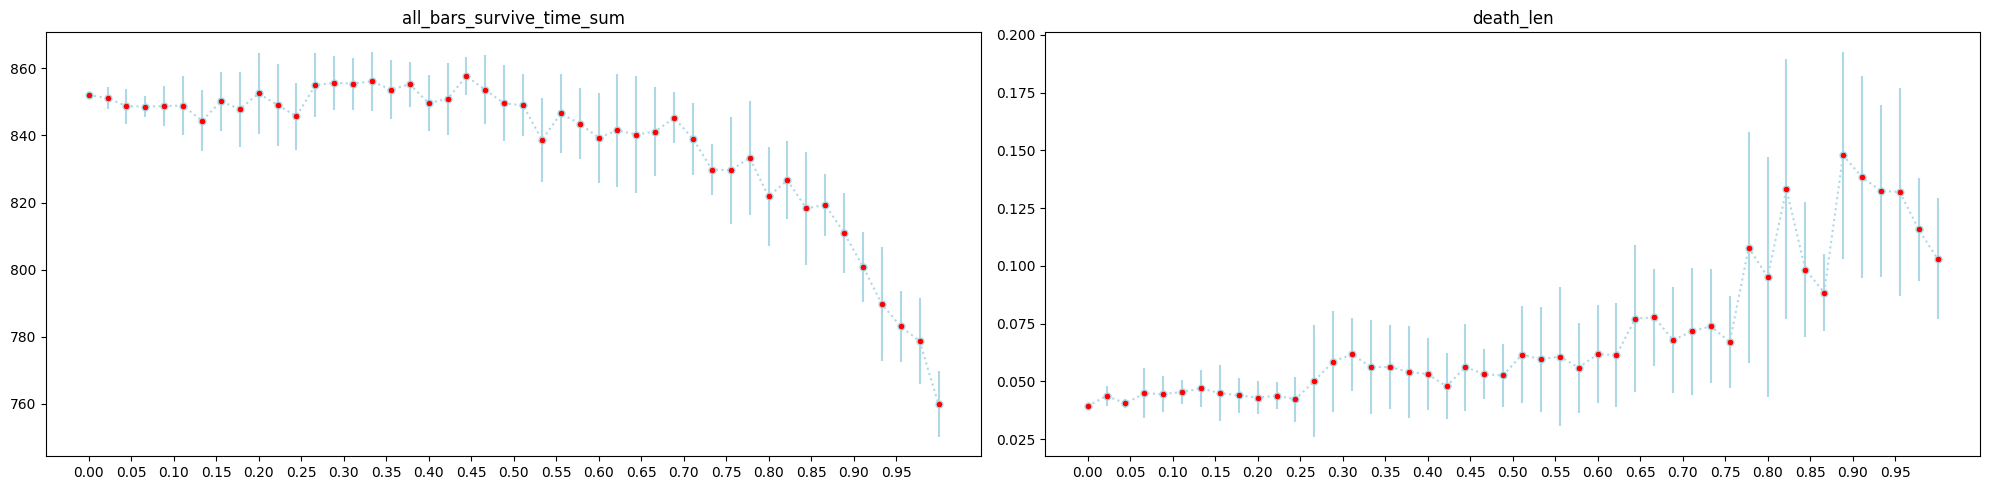

[(759.9206, 9.760067241828873), (778.72754, 12.87793604982707), (783.0958, 10.580418402253066), (789.7714, 17.09464883315397), (800.91504, 10.459057387767851), (810.9642, 11.859408236543446), (819.33606, 9.276786173647865), (818.2877, 16.89391708429414), (826.6139, 11.64173595545666), (821.85486, 14.825744913158772), (833.30554, 16.964200815515895), (829.62524, 16.010940623618904), (829.85114, 7.541594120538618), (838.9487, 10.819108966190779), (845.26404, 7.6305984166696925), (841.16895, 13.163515880593534), (840.2677, 17.516915783168066), (841.52484, 16.779554239005723), (839.3245, 13.44513611899944), (843.5087, 10.573638886619525), (846.5409, 11.801163869663938), (838.68054, 12.589004039236743), (848.98254, 9.293898996509395), (849.54346, 11.318935899795658), (853.5884, 10.242063373239393), (857.6543, 5.7039630973589865), (850.90845, 10.74705241223819), (849.6569, 8.338964418047249), (855.2267, 6.610258988383286), (853.6654, 8.749607503364931), (856.1127, 8.866075800034013), (855.47

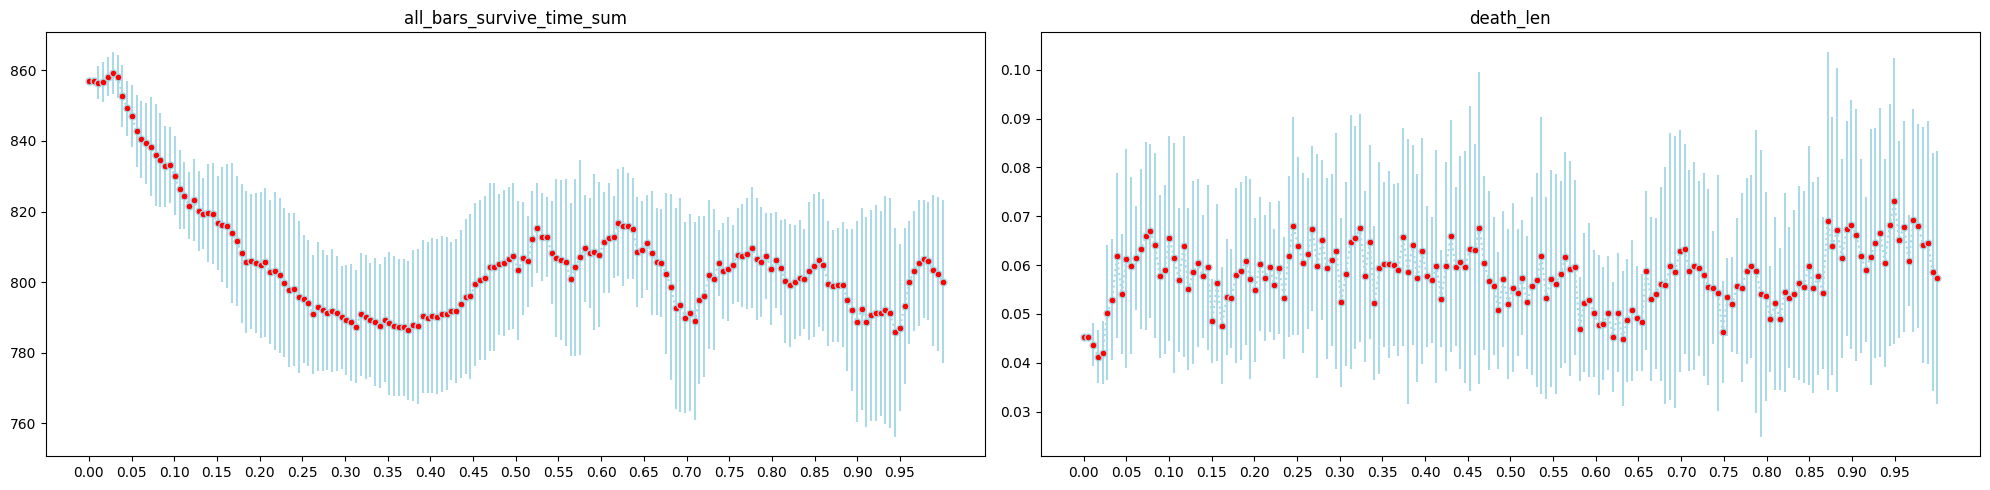

[(856.92474, 0.0), (856.92474, 0.0), (856.54407, 4.656351577403234), (856.73785, 5.7261681561872475), (858.1824, 5.485364547641531), (859.2416, 6.072149385654147), (858.2488, 6.126278330374792), (852.7463, 8.811345162506512), (849.24884, 7.75013259287232), (847.04504, 8.722020320855988), (842.7564, 10.242059362841593), (840.5094, 10.915678070886939), (839.36017, 11.493522272689773), (838.3834, 14.006486919367468), (835.9695, 14.435746589770101), (834.6217, 13.419333606210472), (832.8949, 11.47024525675212), (833.16583, 10.712055247981908), (830.11255, 11.168127168751777), (826.2556, 11.05512819650356), (824.5168, 9.50618081335876), (821.6873, 9.598530833730141), (823.3243, 11.56080565438189), (820.09296, 11.269149212318233), (819.4164, 10.0884596500959), (819.56195, 13.916969446326613), (819.36206, 14.359690913618005), (816.77936, 13.214021447238354), (816.28955, 16.283686905750272), (815.7872, 17.549583877903807), (813.91986, 19.92907722460418), (811.7288, 18.365960444844), (808.18494

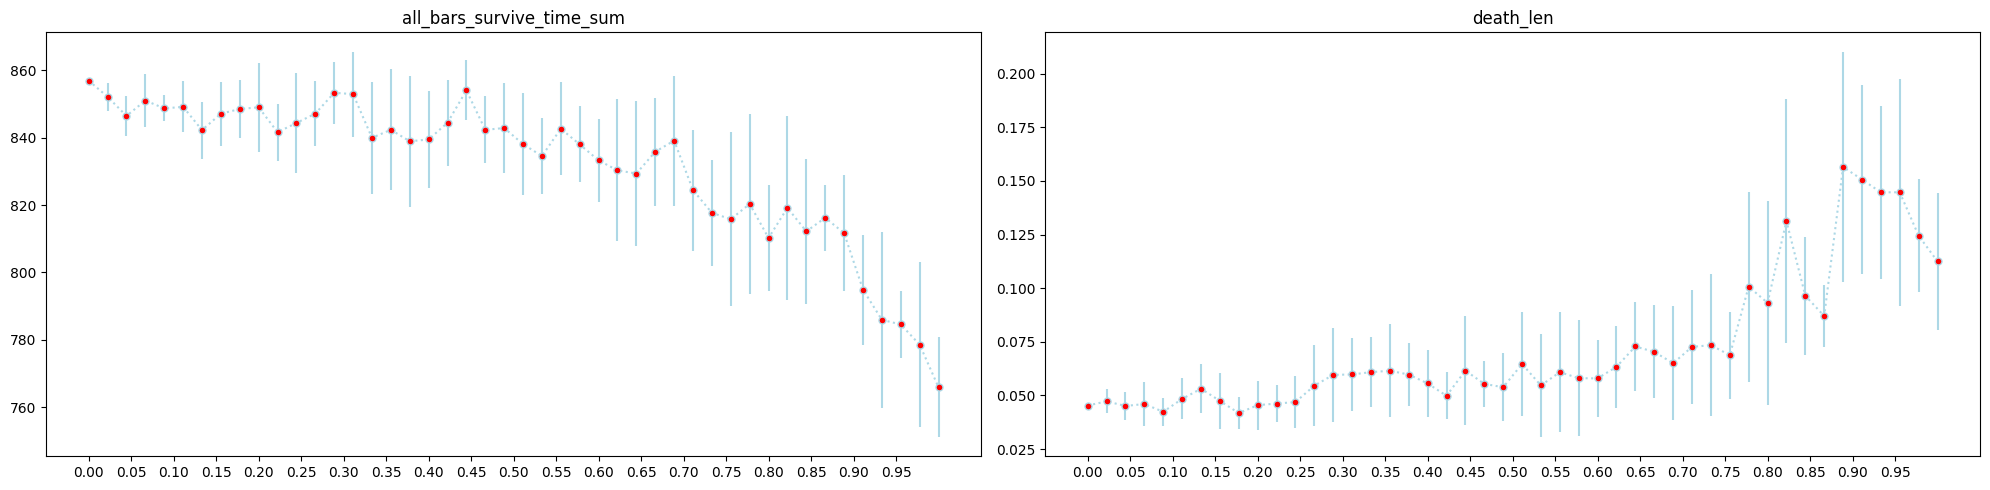

[(765.9145, 14.776075417779584), (778.573, 24.600604332475378), (784.54846, 10.056064517242802), (785.9384, 26.113074533751835), (794.9085, 16.31661093436864), (811.66, 17.26992156975466), (816.23254, 9.819099413356692), (812.17554, 21.634925859507707), (819.1798, 27.279321941813713), (810.21826, 15.810815375021312), (820.3293, 26.71003175210993), (815.79895, 25.87990470228498), (817.68756, 15.703207757310276), (824.42816, 17.936509204888694), (839.12213, 19.279235383277925), (835.824, 16.06014682803566), (829.3593, 21.62334754528525), (830.29474, 21.103203360268356), (833.2735, 12.221601175498106), (837.9973, 11.299364839405001), (842.65753, 13.849924194182432), (834.5531, 11.191779733357956), (838.07947, 15.144887879927476), (842.8735, 13.460134659754933), (842.3228, 9.9256931392264), (854.0392, 8.93170056482039), (844.44495, 12.784424064452732), (839.4665, 14.458981029189715), (838.93134, 19.52080158186553), (842.3462, 17.917453706467835), (839.96216, 16.71111670797718), (852.9301, 

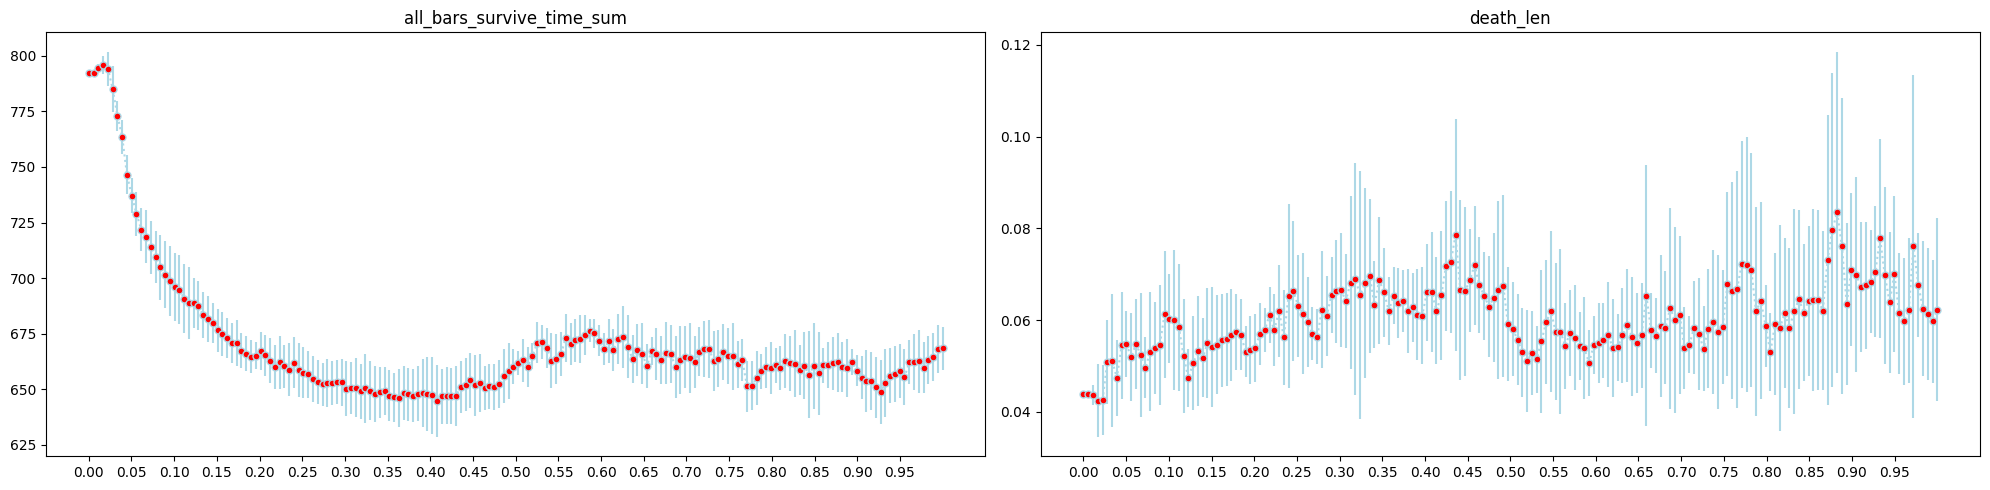

[(792.4922, 0.0), (792.4922, 0.0), (794.6399, 1.5763230339152476), (795.86, 3.931453824863044), (794.27795, 7.630046542367841), (785.2352, 10.305050892811566), (773.08777, 6.749926001212812), (763.48456, 7.6486059492432865), (746.60876, 8.679892857261839), (737.10004, 7.9355843763889045), (728.9016, 9.808190133795014), (721.8091, 9.527835120309962), (718.71326, 12.04102943127595), (713.85736, 11.878530165240345), (709.5492, 11.52753199495586), (704.86554, 14.686625459891061), (701.4761, 15.142424649872495), (698.8048, 15.674155378485832), (696.139, 15.371356243794855), (694.7697, 15.486086424887255), (690.7874, 15.595298733460348), (688.7434, 16.28693761068634), (688.60876, 11.24759622816929), (687.67194, 11.034339824938504), (683.2896, 10.401475618555517), (681.5586, 10.467434440111324), (679.65186, 9.046157970867275), (676.484, 9.786324275338952), (674.8599, 9.784943426750937), (673.0388, 9.025002357844963), (670.98004, 9.004477582555785), (670.8055, 10.44208521181104), (667.31995, 7

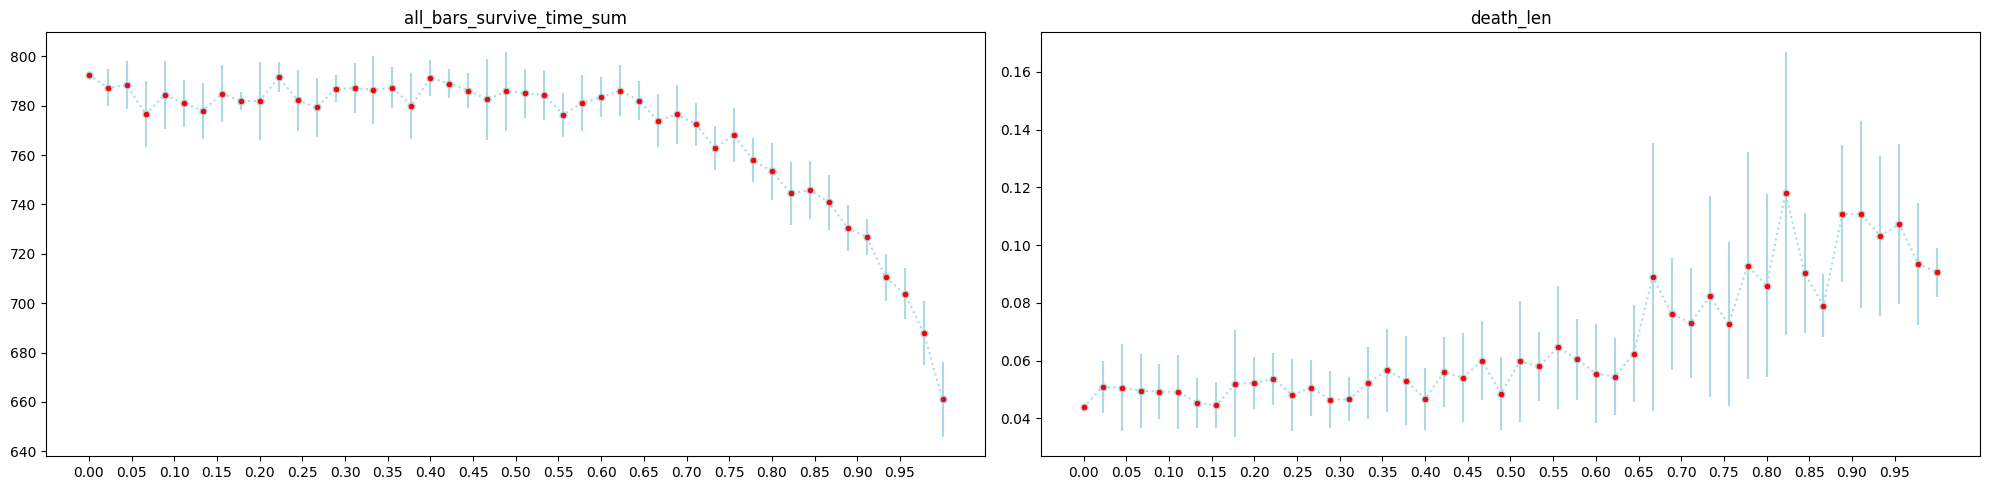

[(661.0403, 15.24951081463039), (688.0634, 12.948431106875653), (703.8622, 10.312781377318812), (710.398, 9.518980680328598), (726.8511, 7.2368586887092485), (730.44476, 9.38650097098929), (740.87854, 11.096265844683165), (745.80927, 11.721223664328862), (744.4921, 12.711373469203323), (753.4126, 11.609740470718735), (758.0209, 8.816648722125974), (768.0292, 10.94383744362948), (762.7228, 8.840144211152433), (772.43207, 8.638464877065195), (776.44055, 11.902276361998942), (773.87787, 10.662081410433714), (782.06445, 7.735067257371217), (786.08203, 10.360742246816324), (783.34595, 8.126441213705137), (781.13727, 11.337776032287735), (776.24774, 8.75700319056769), (784.3538, 10.270121992261652), (784.9522, 10.072117285262507), (785.8772, 16.002746318701014), (782.50323, 16.319175495874287), (786.02405, 7.100060265609377), (788.9573, 5.951250042287401), (791.2365, 7.303272243232599), (780.03723, 13.36415176783295), (787.30084, 8.286804879365123), (786.3982, 13.702912415096716), (787.0617,

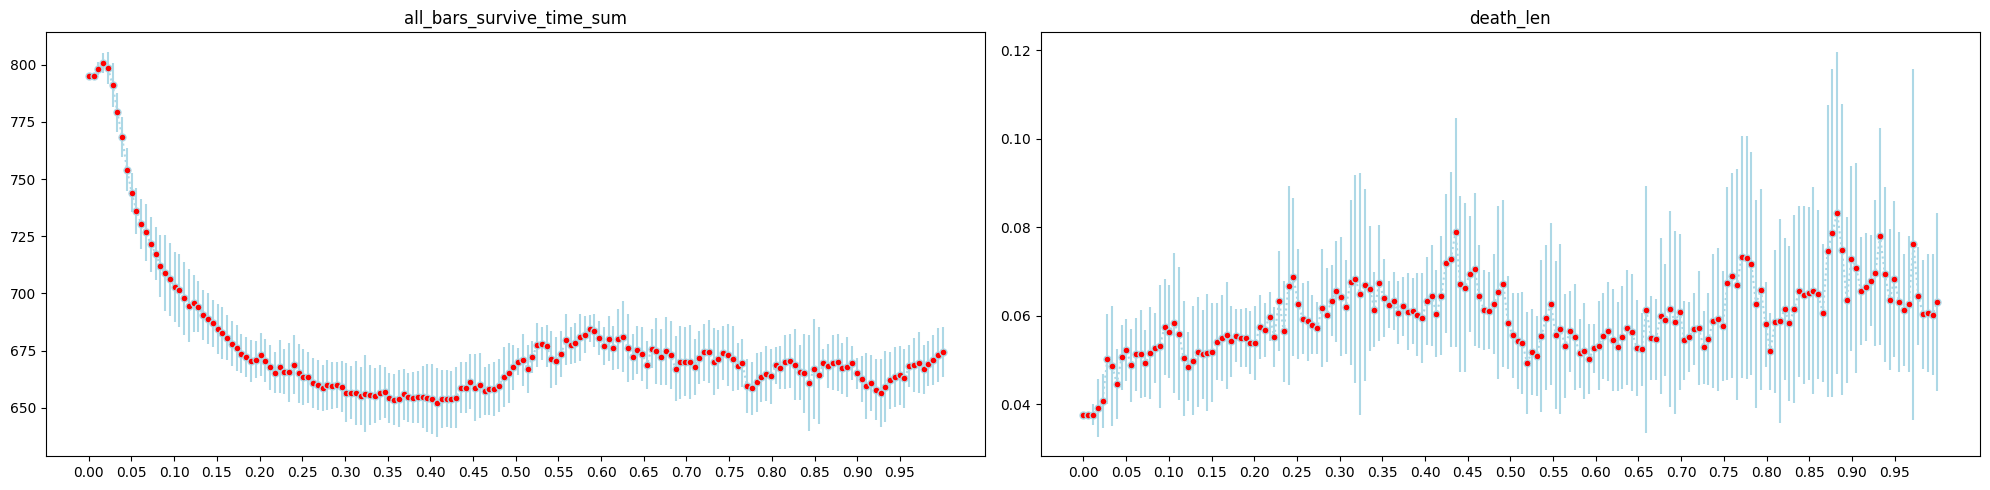

[(795.2896, 0.0), (795.2896, 0.0), (798.3028, 2.840687836912701), (800.8396, 4.465726745820562), (798.7818, 7.006192556417596), (791.22003, 9.503285024140622), (779.1851, 8.4445225430189), (768.2793, 8.801555950885106), (754.1743, 9.311260738320023), (744.10004, 8.585099889851318), (736.1561, 10.158647297397206), (730.3408, 10.884038046633048), (726.6703, 12.366781847647005), (721.5872, 12.037939136707545), (717.3593, 11.679615251219511), (712.1227, 13.56787177251023), (708.7257, 16.630221751847376), (706.14874, 15.996632493769027), (702.8084, 15.116578372887794), (701.34094, 15.86380787650858), (697.9518, 15.991662230828751), (694.612, 16.000164065522576), (695.6621, 12.47421447638253), (694.16504, 11.088108249420781), (690.70776, 10.986285680936605), (688.881, 11.233202499894553), (686.9082, 10.407875664791083), (684.3758, 11.087035915111667), (682.4788, 11.35438720232302), (680.59546, 9.811391121082746), (677.9754, 9.891387455834874), (676.23145, 9.977955657591128), (673.57416, 8.44

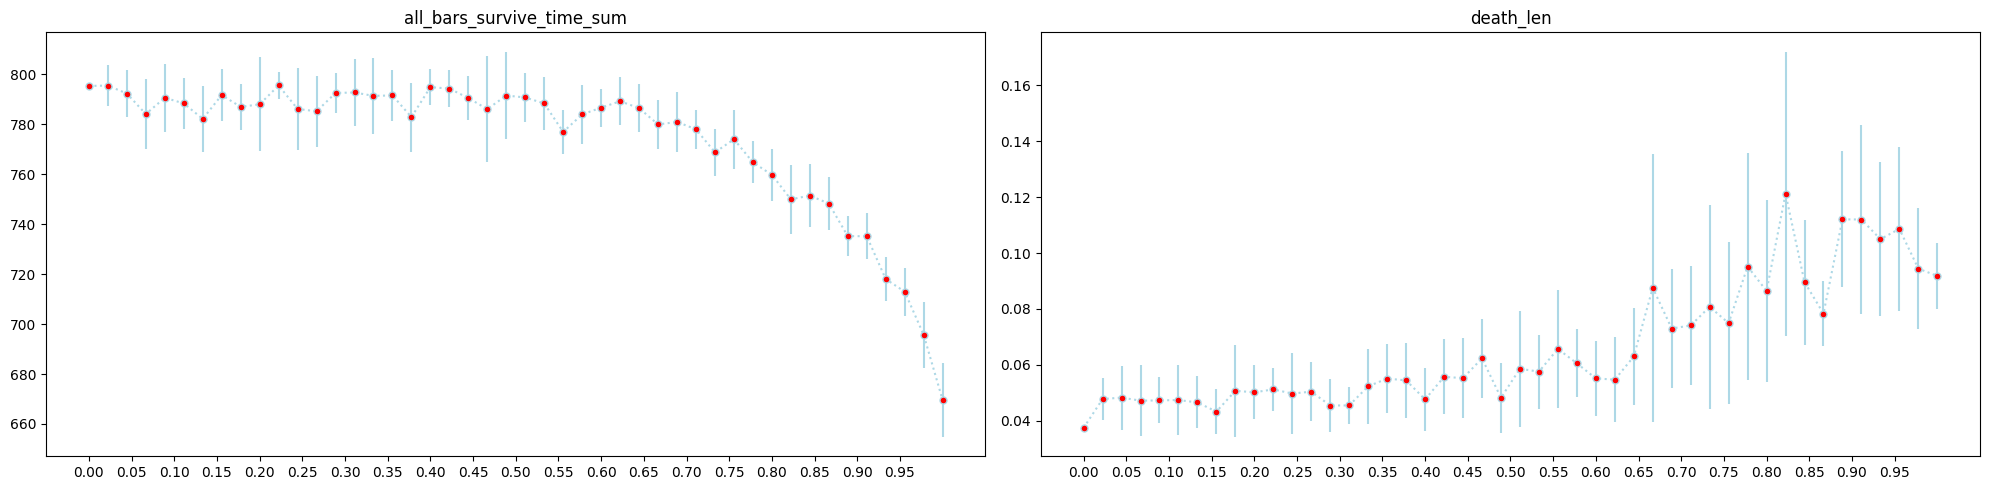

[(669.57184, 14.780640941484581), (695.7052, 13.239585556917794), (712.9422, 9.599748270507416), (718.01135, 8.908303924078451), (735.14325, 9.118186872021449), (735.1703, 8.090506738924695), (748.2242, 10.683716329390148), (751.4098, 12.745979295787876), (749.88934, 13.687267085620114), (759.7161, 10.442143827117404), (764.6955, 8.383504895764963), (773.9647, 11.843119949068619), (768.68445, 9.37063235533578), (777.926, 7.684671248166038), (780.88434, 12.10627613837002), (779.86414, 9.982752222377249), (786.4144, 9.609611524257222), (789.151, 9.55005639647106), (786.6003, 7.614386976152576), (783.8895, 11.725612750340058), (776.8784, 8.78292697123582), (788.2747, 10.528007523742843), (790.6656, 9.773065900459455), (791.44867, 17.574817133844224), (786.0081, 21.294352334598088), (790.4371, 8.805426411160326), (794.22675, 7.3732958881385136), (794.8053, 7.1504562689160975), (782.81555, 13.770641146792864), (791.4843, 10.22765909442392), (791.30664, 15.295097601104668), (792.6645, 13.581

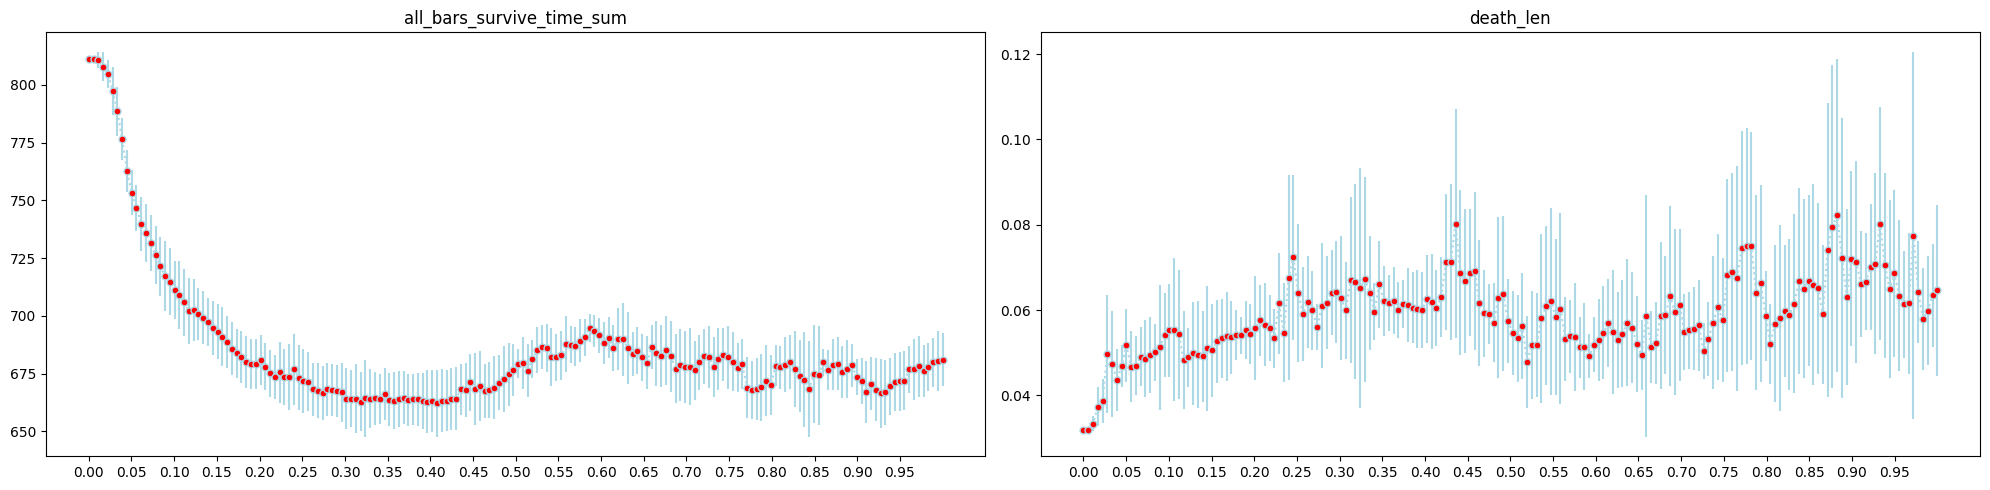

[(811.0676, 0.0), (811.0676, 0.0), (810.88916, 3.5763162733014684), (807.99384, 6.224355648691991), (804.76904, 6.08458031352808), (797.3809, 10.238115460548425), (788.5338, 10.474812594700841), (776.4632, 9.111950104603862), (762.81433, 9.159623028823516), (753.2749, 9.706554470521002), (746.71704, 10.074524873327428), (739.71014, 11.620538518084901), (735.7734, 12.638372335930864), (731.4502, 12.032173968592875), (726.3706, 12.702742965677194), (721.41077, 12.723211148108003), (717.217, 15.107211402468636), (714.8462, 14.660606336095137), (711.0048, 12.572873650655099), (709.0686, 14.908732351042818), (705.9315, 14.479966633925025), (702.017, 14.184108038239676), (702.611, 13.348949104332682), (700.6632, 11.196245541564467), (699.2738, 11.534617589145189), (697.3809, 10.55010515174923), (694.8091, 11.836203915460404), (693.1459, 11.873384075512021), (690.98773, 12.909085845426619), (688.81396, 11.19455158835476), (685.8562, 11.50517140691676), (683.8083, 10.613176043263984), (682.275

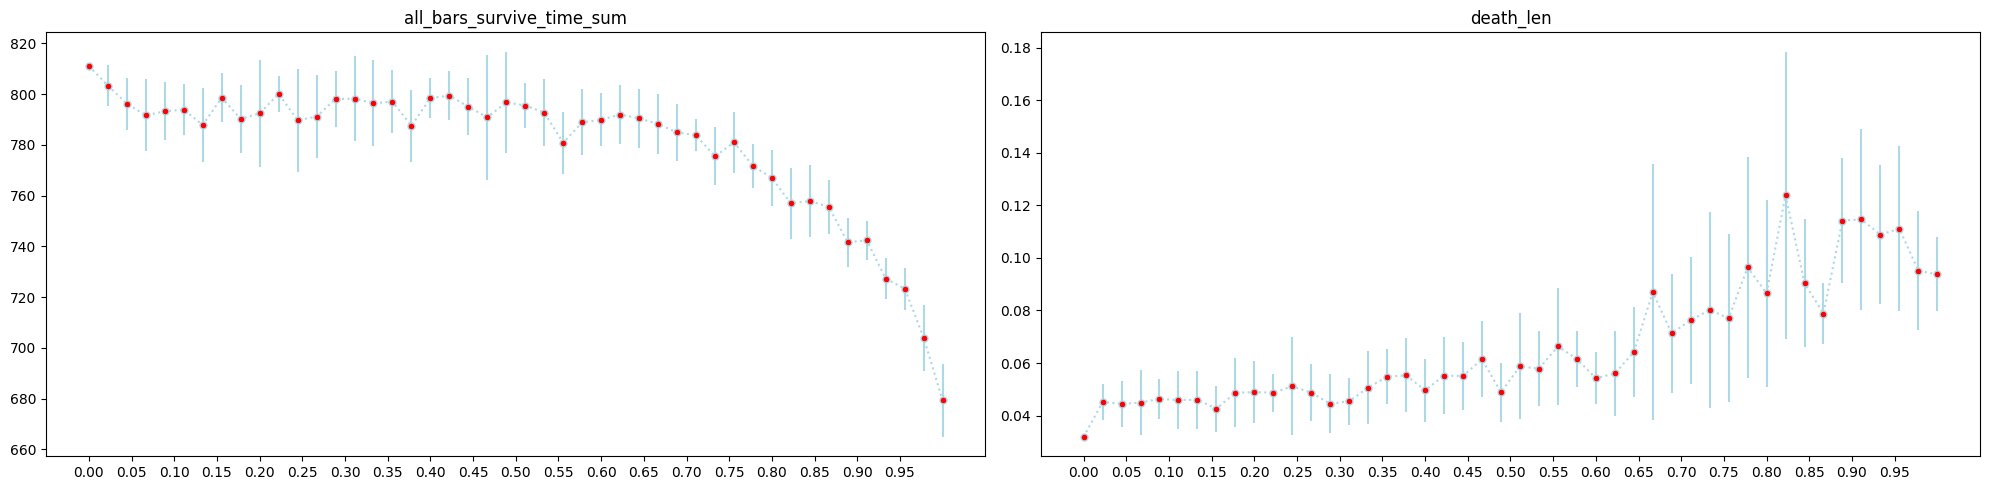

[(679.31335, 14.398183470372564), (704.04706, 13.029938917684893), (723.3667, 8.28848417543502), (727.28485, 8.088737729845658), (742.40607, 7.737127587453141), (741.58704, 9.545527739195267), (755.5299, 10.498643568328326), (757.88983, 14.063748051222275), (756.8882, 13.931167453674199), (766.9517, 10.897238155808557), (771.6985, 8.675392377614761), (780.9737, 11.893421764413874), (775.42004, 11.406332407217112), (783.7987, 6.207171504108781), (784.86945, 11.092530612144365), (788.2138, 11.680610165429448), (790.4116, 11.488494467245618), (791.9187, 11.655858342211625), (789.8724, 10.534601032492839), (788.84784, 13.024255701695973), (780.8058, 12.129136316312136), (792.7023, 13.087474299193596), (795.4751, 8.876322085068573), (796.69904, 20.01011690456454), (790.82733, 24.553177289837937), (795.0181, 11.19358790519779), (799.3843, 9.796222938910978), (798.4125, 7.81437709674909), (787.4838, 14.240084199968543), (796.95984, 12.42670661616943), (796.3962, 17.05541262693983), (798.1555,

In [12]:
import matplotlib.pyplot as plt
from pdb import set_trace as bp


model_name_list = ['MLP', 'LeNet', 'ResNet18', 'ResNet34', 'ResNet50', 'ResNet101', 'ResNet152']
aug_name_list = ['angle', 'scale']
log_model_aug = {}

for model_name in model_name_list:
    log_model_aug[f'{model_name}'] = {}  # 初始化每个model_name对应的字典
    for aug_name in aug_name_list:
        print(model_name, aug_name)
        log_model_aug[f'{model_name}'][f'{aug_name}'] = get_bset_tda_aug(model_name=model_name, aug_name=aug_name)
        plt.close()
        
        # bp()

print(log_model_aug)


## 读取Acc数据

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

class Plotter:
    def __init__(self, tda_path, acc_path, sheet_name, save_path):
        self.tda_path = tda_path
        self.acc_path = acc_path
        self.tda_sheet_name = sheet_name
        self.acc_sheet_name = sheet_name
        self.save_path = save_path
        # 确保保存路径存在，如果不存在则创建
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path)
    def load_dataframes(self):
        # 读取 Excel 文件为 DataFrame
        
        self.df_acc = pd.read_excel(self.acc_path, sheet_name=self.acc_sheet_name)

    def generate_plots(self):
        

        # 确保两个 DataFrame 的列数相同
        

        # 获取列名列表
       
        acc_columns = self.df_acc.columns

        # 遍历每一列并绘制图像
        for acc_col in acc_columns:
            # 获取数据并绘图
           
            acc_data = self.df_acc[acc_col]

            # # Normalize the data using MinMaxScaler
            # scaler = MinMaxScaler()
            # normalized_tda_data = scaler.fit_transform(np.array(tda_data).reshape(-1, 1))
            # normalized_acc_data = scaler.fit_transform(np.array(acc_data).reshape(-1, 1))

            # 计算最大值
           
            max_value_acc = list(acc_data).index(max(list(acc_data)))

            # print(max_value_acc)
            if aug_name == 'angle' or 'Angle':
                aug_range = range(0, 180, 1)
            elif aug_name == 'scale':
                aug_range = np.arange(0.1, 1.02, 0.02)[::-1]
            print(aug_range[max_value_acc])
            
            

# 使用示例
tda_excel_path = '.\\Result\\NetTDA_2_0th\\model_TDA.xlsx'
acc_excel_path = '.\\Result\\best_val_acc.xlsx'

plotter = Plotter(tda_excel_path, acc_excel_path, 'Angle', './Result/compare_TDA_ACC/angle')
plotter.load_dataframes()
plotter.generate_plots()
# print(plotter.tda_result_df.head())

179
16
32
26
43
21
70
98


In [14]:
log_tda = {'MLP':{'angle':32, 'scale':0.8400000000000001}, 'LeNet':{'angle':16, 'scale':0.7200000000000001}, 'ResNet18':{'angle':26, 'scale':0.8000000000000002}, 'ResNet34':{'angle':43, 'scale':0.8400000000000001}, 'ResNet50':{'angle':21, 'scale':0.8200000000000002}, 'ResNet101':{'angle':70, 'scale':0.7200000000000002}, 'ResNet152':{'angle':98, 'sacle':0.8000000000000002}}

## 对比TDA和Acc

In [15]:
print(log_model_aug)

{'MLP': {'angle': 6, 'scale': 1.0000000000000002}, 'LeNet': {'angle': 0, 'scale': 1.0000000000000002}, 'ResNet18': {'angle': 3, 'scale': 0.6000000000000001}, 'ResNet34': {'angle': 5, 'scale': 1.0000000000000002}, 'ResNet50': {'angle': 3, 'scale': 1.0000000000000002}, 'ResNet101': {'angle': 3, 'scale': 0.8000000000000002}, 'ResNet152': {'angle': 0, 'scale': 1.0000000000000002}}


Spearman correlation for angle: 0.0748


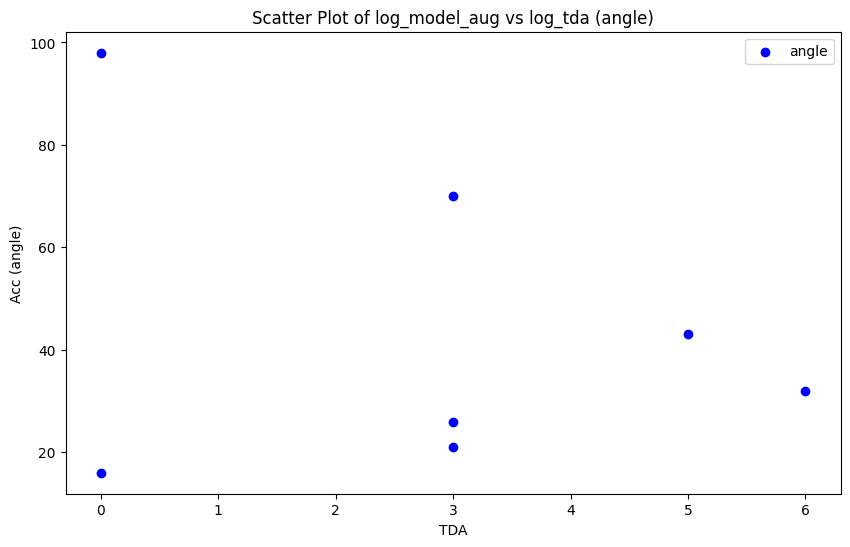

Spearman correlation for scale: nan


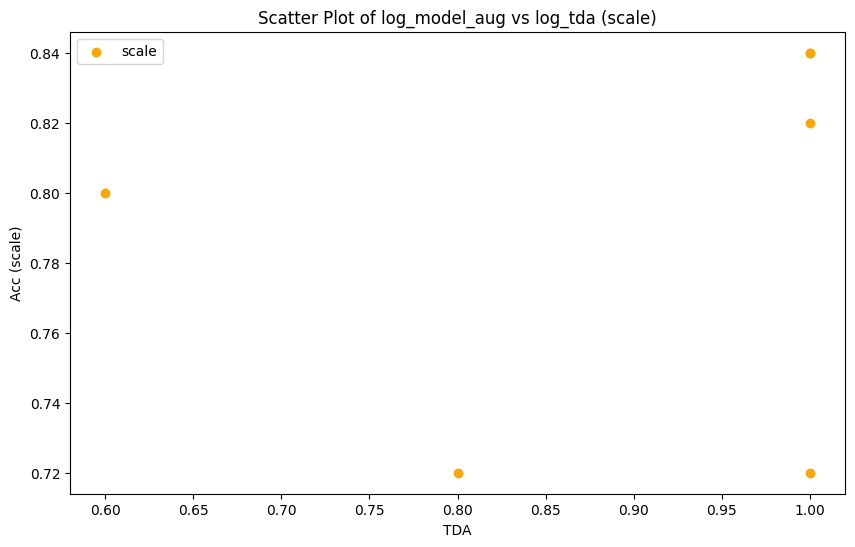

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 提供的数据
TDA_aug = {'MLP':{'angle':32, 'scale':0.8400000000000001}, 'LeNet':{'angle':16, 'scale':0.7200000000000001}, 'ResNet18':{'angle':26, 'scale':0.8000000000000002}, 'ResNet34':{'angle':43, 'scale':0.8400000000000001}, 'ResNet50':{'angle':21, 'scale':0.8200000000000002}, 'ResNet101':{'angle':70, 'scale':0.7200000000000002}, 'ResNet152':{'angle':98, 'sacle':0.8000000000000002}}

Acc_aug = {'MLP': {'angle': 6, 'scale': 1.0000000000000002}, 'LeNet': {'angle': 0, 'scale': 1.0000000000000002},
                 'ResNet18': {'angle': 3, 'scale': 0.6000000000000001}, 'ResNet34': {'angle': 5, 'scale': 1.0000000000000002},
                 'ResNet50': {'angle': 3, 'scale': 1.0000000000000002}, 'ResNet101': {'angle': 3, 'scale': 0.8000000000000002},
                 'ResNet152': {'angle': 0, 'scale': 1.0000000000000002}}

# 将数据转换为 Pandas DataFrame
df_tda = pd.DataFrame(log_tda).transpose()
df_model_aug = pd.DataFrame(log_model_aug).transpose()

# 绘制 angle 的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df_model_aug['angle'], df_tda['angle'], label='angle', color='blue')

# 添加标签和标题
plt.xlabel('TDA')
plt.ylabel('Acc (angle)')
plt.title('Scatter Plot of log_model_aug vs log_tda (angle)')

# 添加图例
plt.legend()

# 计算并打印 Spearman 相关性
spearman_corr_angle, _ = spearmanr(df_model_aug['angle'], df_tda['angle'])
print(f"Spearman correlation for angle: {spearman_corr_angle:.4f}")

# 显示图形
plt.show()

# 绘制 scale 的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df_model_aug['scale'], df_tda['scale'], label='scale', color='orange')

# 添加标签和标题
plt.xlabel('TDA')
plt.ylabel('Acc (scale)')
plt.title('Scatter Plot of log_model_aug vs log_tda (scale)')

# 添加图例
plt.legend()

# 计算并打印 Spearman 相关性
spearman_corr_scale, _ = spearmanr(df_model_aug['scale'], df_tda['scale'])
print(f"Spearman correlation for scale: {spearman_corr_scale:.4f}")

# 显示图形
plt.show()


# 研究BOF和Acc之间的关系
7 plots (one for each model)

X-axis: BoF of each augmentation magnitude

Y-axis: validation accuracy of each augmentation magnitude

然后算一下X Y的spearman correlation

> 这个部分似乎不应该放在这里，所以只是写一下，后面放在BOF的研究部分好了